In [99]:
print("hello hars")

hello hars


in this code we have tot 30 input nurons and we have 1 out put nuron it is binary type because we have to predict weather cancer is there or not
we are taking hidden layers as 16 how we are taking explained below



In [100]:
from google.colab import files  #this code is extracted from google colab source to extract our file

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data8.csv to data8 (2).csv
User uploaded file "data8.csv" with length 125204 bytes


In [101]:
import pandas as pd   #he has done like this
import io
data=pd.read_csv(io.StringIO(uploaded['data8.csv'].decode('utf-8')))
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [102]:
import pandas as pd   #own
import io
data=pd.read_csv('data8.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [98]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Benign 357
Malignant 212


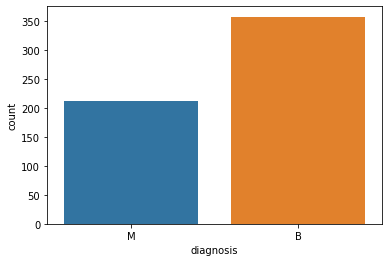

In [103]:
#this is data is about breast cancer to know qty of benign and maligant cancer 
import seaborn as sns
ax=sns.countplot(data['diagnosis'],label='count')     #for visualaization
B,M=data['diagnosis'].value_counts()
print("Benign",B)                                      #printing qty
print("Malignant",M)

In [104]:
#in our data a unknown atribute(means column which do not contain any informination (see last column))
import numpy as np
import matplotlib.pyplot as plt

del data['Unnamed: 32']  #column name only unknown:32

In [105]:
x=data.iloc[:,2:]   #here x(input) is indipendent variable column is o/p so we are extracting all the column except 1st
y=data.iloc[:,1]    #here y is(o/p) is dependent variable that is based on input it tells wheather a person has cacner or not
#our o/p is catagorical type like benign and maliganant to convert this into numerical form we use label encoding ex:-- benign=0,malignant=1
from sklearn.preprocessing import LabelEncoder
labelencoder_x_1=LabelEncoder()  
y=labelencoder_x_1.fit_transform(y)
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)
#feature scaling:-- our range of i/p is diffrent for diffrent columns so to bring all column values to a common scale we use this
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [106]:
x_train    #see range is +1 to -1

array([[-0.52787029,  2.49821982, -0.59939466, ..., -1.74713139,
        -0.79044533, -0.91054389],
       [-0.55333608,  0.29431013, -0.60759343, ..., -0.62275667,
        -0.33646358, -0.83551633],
       [ 2.15452653,  0.40392257,  2.26525805, ...,  1.03846122,
        -0.11504791,  0.26488788],
       ...,
       [-1.3297598 , -0.21876938, -1.32088704, ..., -0.98271999,
        -0.718764  , -0.13637062],
       [-1.24940108, -0.24209117, -1.2835826 , ..., -1.74713139,
        -1.58690456, -1.01280367],
       [-0.74291476,  1.08958336, -0.71827692, ..., -0.2865488 ,
        -1.26354211,  0.19486216]])

In [107]:
x_test

array([[-0.20813312,  0.29431013, -0.13944326, ...,  1.35620942,
         1.08282676,  1.50534354],
       [-0.26189423,  1.39743106, -0.3255555 , ..., -0.83852283,
        -0.73469319, -0.8855347 ],
       [-0.0327021 , -0.83912914, -0.10049907, ..., -0.50397936,
        -1.22531207, -0.92888396],
       ...,
       [-0.47410917,  0.14738282, -0.47600306, ..., -0.59340278,
        -0.35079984, -0.34311323],
       [-0.75423289, -0.7528385 , -0.77976775, ..., -0.75636222,
        -0.08637538,  0.21209071],
       [-0.79667588,  1.82421992, -0.83142005, ..., -1.43195543,
        -0.08956122, -0.71936255]])

In [65]:
pip install keras

In [108]:
import keras
from keras.models import Sequential #Sequential is helpful for moving data from input to o/p step by step in nural network
from keras.layers import Dense      #it helps in adding hidden layer

In [110]:
# adding the i/p and first hidden layer
classifier=Sequential()  #in this model we are creating ANN
#to add layes(here we are adding layers input_dim is no of input values=30,and  here output_dim is input to hidden layer so o/p = ((i/p+final_o/p)/2)={(30+1)/2})
#init is intial value here we are taking this as uniform distrubution,activation is type of activation function we are using
classifier.add(Dense(units=16,kernel_initializer='random_uniform',activation='relu',input_dim=30))  
#adding the second hidden layer(for second layer we dont need i/p because we are already having i/p(previuoes o/p))
classifier.add(Dense(units=16,kernel_initializer='random_uniform',activation='relu'))
#adding the o/p layer
classifier.add(Dense(units=1,kernel_initializer='random_uniform',activation='sigmoid'))

In [74]:
pip install keras --upgrade

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


In [75]:
pip install tensorflow --upgrade

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.0)


In [111]:
#optimaizer :-- we can adjust the value of weight(adam is type of optimaizer in stachostic methode) ,loss=it is like error which feeded back through back propagation
#methode we have 2 o/p so we are using binary_crossentropy#from matrices we can unerstand accuracy in each step or apeque
classifier.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

In [112]:
classifier.fit(x_train,y_train,batch_size=100,epochs=150)  #at a time 100 values in bathch will get trained

Epoch 1/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.6816
Epoch 2/150
6/6 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.7422
Epoch 3/150
6/6 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.8301
Epoch 4/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.8848
Epoch 5/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.9219
Epoch 6/150
6/6 [==============================] - 0s 1ms/step - loss: 0.6619 - accuracy: 0.9355
Epoch 7/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.9375
Epoch 8/150
6/6 [==============================] - 0s 1ms/step - loss: 0.6235 - accuracy: 0.9375
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.9395
Epoch 10/150
6/6 [==============================] - 0s 1ms/step - loss: 0.5603 - accuracy: 0.9395
Epoch 11/150
6/6 [===========

In [113]:
x_test

array([[-0.20813312,  0.29431013, -0.13944326, ...,  1.35620942,
         1.08282676,  1.50534354],
       [-0.26189423,  1.39743106, -0.3255555 , ..., -0.83852283,
        -0.73469319, -0.8855347 ],
       [-0.0327021 , -0.83912914, -0.10049907, ..., -0.50397936,
        -1.22531207, -0.92888396],
       ...,
       [-0.47410917,  0.14738282, -0.47600306, ..., -0.59340278,
        -0.35079984, -0.34311323],
       [-0.75423289, -0.7528385 , -0.77976775, ..., -0.75636222,
        -0.08637538,  0.21209071],
       [-0.79667588,  1.82421992, -0.83142005, ..., -1.43195543,
        -0.08956122, -0.71936255]])

In [114]:
#predicting the test set results 
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [115]:
#making the confusion matrix were we can measure accuracy quit well 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

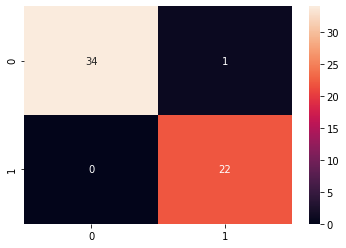

In [116]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')    #right prediction =34+22 wrong prediction=1